# EECS16A Discussion 3B

## Visualizing Matrices as Operations

This exercise is going to help you visualize matrices as operations. For example, when we multiply a vector by a rotation matrix, we will see it "rotate" in the true sense here. Similarly, when we multiply a matrix by a scalar matrix, we will see it "scale". The way we will see this is by applying the operation to all the vertices of a polygon and seeing how the polygon changes.
Let's first do the necessary imports and define some useful functions to do this.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""Function that takes the vertices of a polygon and applies a matrix "transformation" to each of them, effectively
"transforming" the polygon."""
def transform_the_polygon(polygon, T):

    transformed_polygon = []
    for point in polygon:
        transformed_point = np.dot(T, point)
        transformed_polygon.append(transformed_point)
    return transformed_polygon

"""Function that plots a polygon in the x-y plane, given its vertices as x-y coordinates. The plot is defined in terms
of line segments connecting all adjacent vertices of the polygon."""
def plot_the_polygon(polygon):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, xlim = [-4, 4], ylim = [-4, 4])
    for i in range(len(polygon) - 1):
        ax.plot([polygon[i][0], polygon[i+1][0]],
                [polygon[i][1], polygon[i+1][1]], linewidth=4)
    ax.plot([polygon[i+1][0], polygon[0][0]], [polygon[i+1][1], polygon[0][1]], linewidth=4)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle = '--', linewidth = 2)
    ax.axvline(x=0, color='k', linestyle = '--', linewidth = 2)
    #plt.show()

Next, we define our starting polygon, a square whose side is of length 1. Let's see what the square looks like.

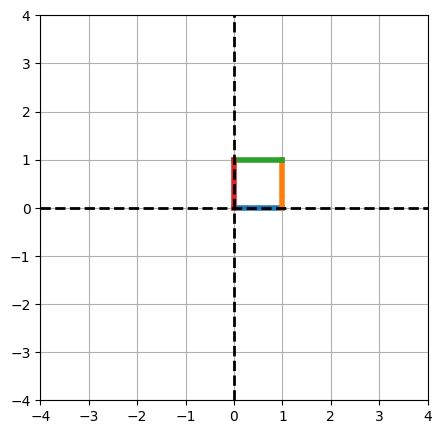

In [2]:
unit_square = [np.array([0,0]), np.array([1,0]), np.array([1,1]), np.array([0,1])]
plot_the_polygon(unit_square)
plt.show()

### Part 1: Rotation Matrices as Rotations

#### Code for the following sections:

(a) Given T1 (15 degree rotation) and T2 (30 degree rotation), describe how to rotate the unit square by 45 degrees.  How about 60 degrees?

(b) Try to rotate the unit squre by 60 degrees using only one matrix.

In [3]:
# R is a "rotation matrix." (anticlockwise)
# Example:
# angle = np.pi/2 # 90 degrees in radians
# R = np.array([[np.cos(angle), -np.sin(angle)],
#              [np.sin(angle), np.cos(angle)]])

angle1 = np.pi/12 # 15 degrees in radians
T1 = np.array([[np.cos(angle1), -np.sin(angle1)],
              [np.sin(angle1), np.cos(angle1)]])

angle2 = np.pi/6 # 30 degrees in radians
T2 = np.array([[np.cos(angle2), -np.sin(angle2)],
              [np.sin(angle2), np.cos(angle2)]])

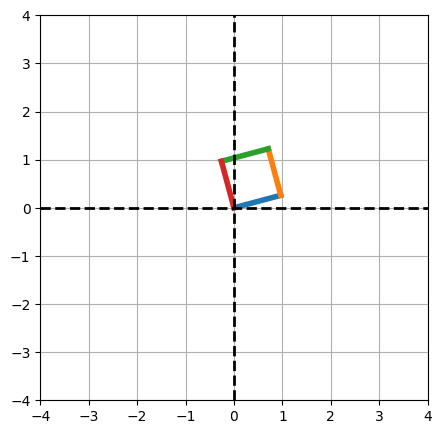

In [4]:
# Rotate unit square by 15 degrees.
rotated_square15 = transform_the_polygon(unit_square, T1)
plot_the_polygon(rotated_square15)

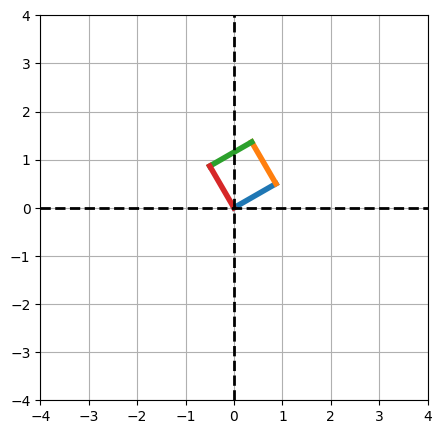

In [5]:
# Rotate unit square by 30 degrees.
rotated_square30 = transform_the_polygon(unit_square, T2)
plot_the_polygon(rotated_square30)

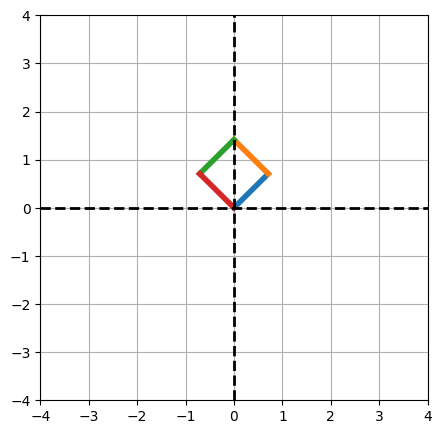

In [6]:
# Rotate unit square by 45 degrees using T1 and T2.
rotated_square45 = transform_the_polygon(rotated_square15, T2)
plot_the_polygon(rotated_square45)

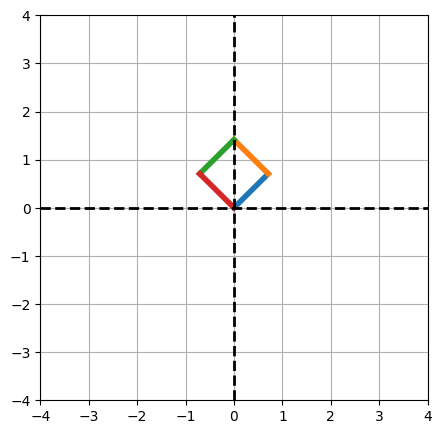

In [7]:
# Rotate unit square by 45 degrees (directly).
angle3 = np.pi/4 # 45 degrees in radians
T3 = np.array([[np.cos(angle3), -np.sin(angle3)],
              [np.sin(angle3), np.cos(angle3)]])

rotated_square45_direct = transform_the_polygon(unit_square, T3)
plot_the_polygon(rotated_square45_direct)

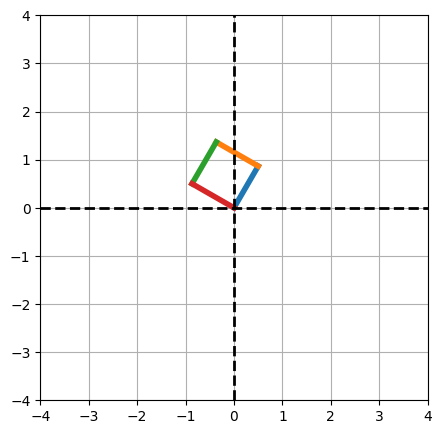

In [8]:
# Rotate unit square by 60 degrees (directly).
angle4 = np.pi/3 # 60 degrees in radians
T4 = np.array([[np.cos(angle4), -np.sin(angle4)],
              [np.sin(angle4), np.cos(angle4)]])

rotated_square60_direct = transform_the_polygon(unit_square, T4)
plot_the_polygon(rotated_square60_direct)

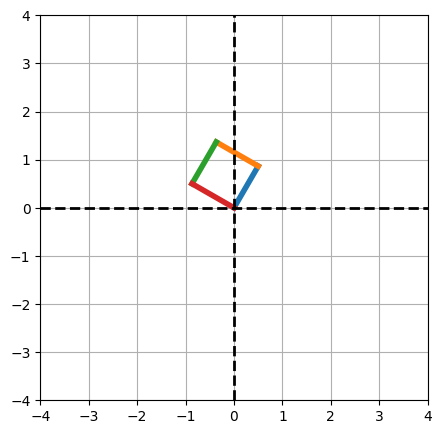

In [9]:
# Rotate unit square by 60 degrees using just T2 (you can also multiply T1 4 times, or multiply 2 T1 matrices with one T2 matrix).
T5 = np.matmul(T2, T2)

rotated_square60 = transform_the_polygon(unit_square, T5)
plot_the_polygon(rotated_square60)

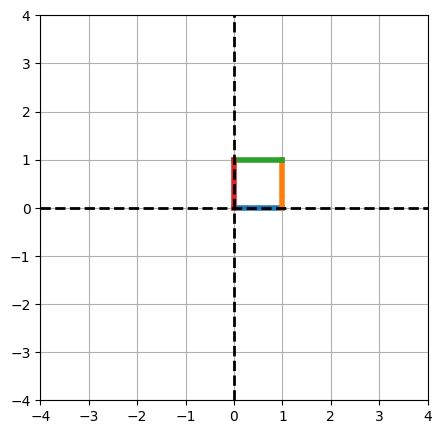

In [10]:
# Rotate unit square by -60 degrees (inverse).
angle5 = -np.pi/3 # 60 degrees in radians
negT5 = np.array([[np.cos(angle5), -np.sin(angle5)],
              [np.sin(angle5), np.cos(angle5)]])

rotated_square_minus60 = transform_the_polygon(rotated_square60, negT5)
plot_the_polygon(rotated_square_minus60)

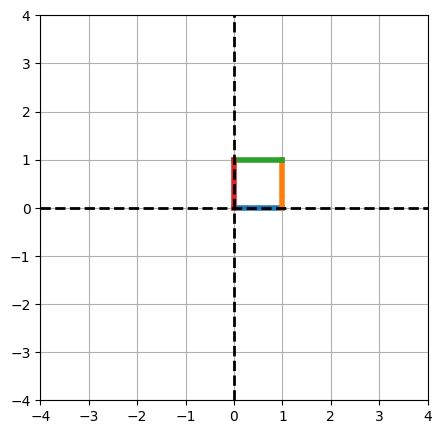

In [11]:
# Rotate unit square by 60 degrees (clockwise).
T6 = np.array([[np.cos(angle4), np.sin(angle4)],
              [-np.sin(angle4), np.cos(angle4)]])

rotated_square_clockwise60 = transform_the_polygon(rotated_square60, T6)
plot_the_polygon(rotated_square_clockwise60)

In [12]:
# Multiply inverse matrix.
print(np.matmul(negT5, T5))

[[ 1.00000000e+00 -1.48741681e-17]
 [-1.48741681e-17  1.00000000e+00]]


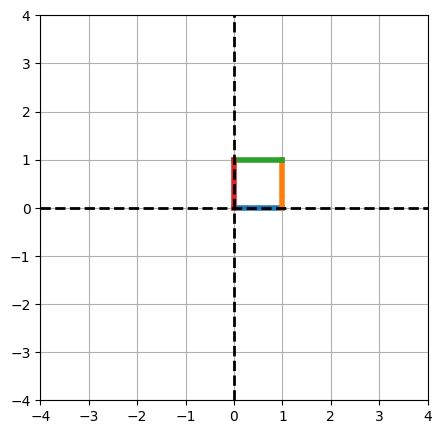

In [13]:
# Re-plotting the unit square
plot_the_polygon(unit_square)
plt.show()

And finally, we can "reflect" the square about the y-axis:

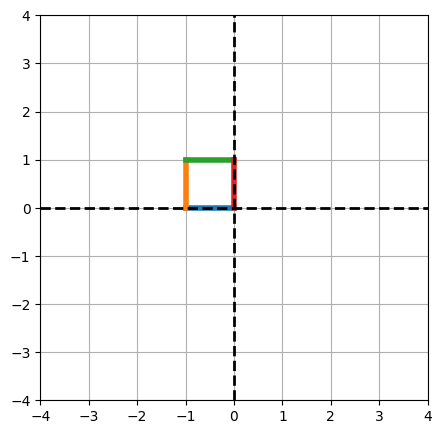

In [14]:
# Reflect about the y-axis.
Re_y = np.array([[-1, 0], [0, 1]])
reflected_square_y = transform_the_polygon(unit_square, Re_y)
plot_the_polygon(reflected_square_y)

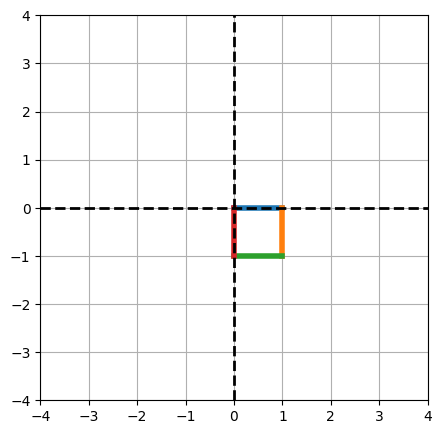

In [15]:
# Reflect about the x-axis.
Re_x = np.array([[1, 0], [0, -1]])
reflected_square_x = transform_the_polygon(unit_square, Re_x)
plot_the_polygon(reflected_square_x)

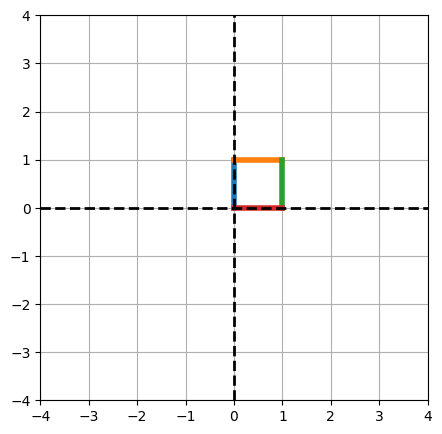

In [16]:
# Reflect about the line x=y.
Re_xy = np.array([[0, 1], [1, 0]])
reflected_square_xy = transform_the_polygon(unit_square, Re_xy)
plot_the_polygon(reflected_square_xy)

### Part 2: Commutativity of Operations

The next natural question to ask is the following: Does the *order* in which you apply these operations matter?

a) Let's see what happens to the unit square when we rotate the matrix by 60 degrees, and then reflect it along the y-axis.

In [17]:
# As the name indicates, R_60 rotates the matrix by 60 degrees.
rotation_angle = np.pi/3 # 60 degrees in radians
R_60 = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                 [np.sin(rotation_angle), np.cos(rotation_angle)]])

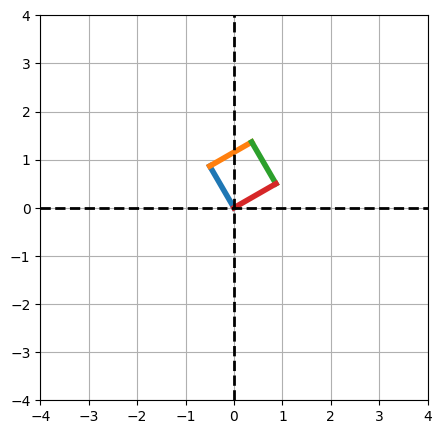

In [18]:
reflected_after_rotated_square = transform_the_polygon(unit_square, R_60)
reflected_after_rotated_square = transform_the_polygon(reflected_after_rotated_square, Re_y)
plot_the_polygon(reflected_after_rotated_square)

In [19]:
# reflected_after_rotated matrix
print(np.matmul(Re_y, R_60))

[[-0.5        0.8660254]
 [ 0.8660254  0.5      ]]


b) Now, let's reflect *before* rotating.

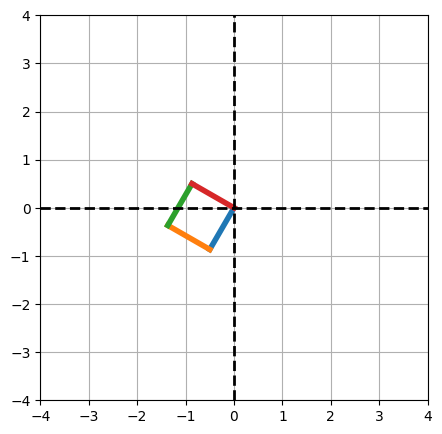

In [20]:
rotated_after_reflected_square = transform_the_polygon(unit_square, Re_y)
rotated_after_reflected_square = transform_the_polygon(rotated_after_reflected_square, R_60)
plot_the_polygon(rotated_after_reflected_square)

In [21]:
# rotated_after_reflected matrix
print(np.matmul(R_60, Re_y))

[[-0.5       -0.8660254]
 [-0.8660254  0.5      ]]


We can also scale the square:

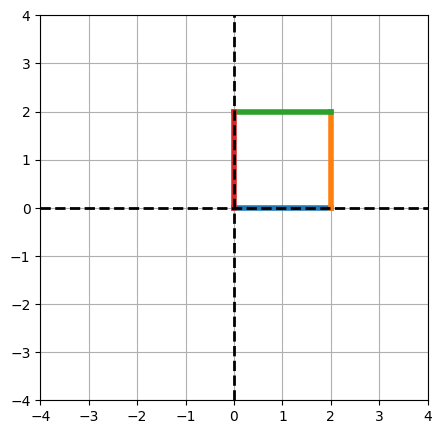

In [22]:
# S is a "scalar matrix."
S = np.array([[2, 0],
              [0, 2]])
scaled_square = transform_the_polygon(unit_square, S)
plot_the_polygon(scaled_square)

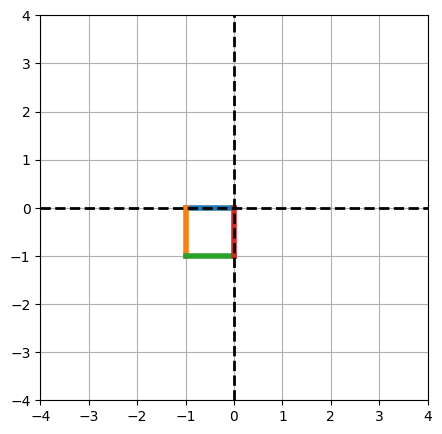

In [23]:
# Reflect about the x-axis first and then the y-axis.
reflected_square_x = transform_the_polygon(unit_square, Re_x)
reflected_square_y_x = transform_the_polygon(reflected_square_x, Re_y)
plot_the_polygon(reflected_square_y_x)

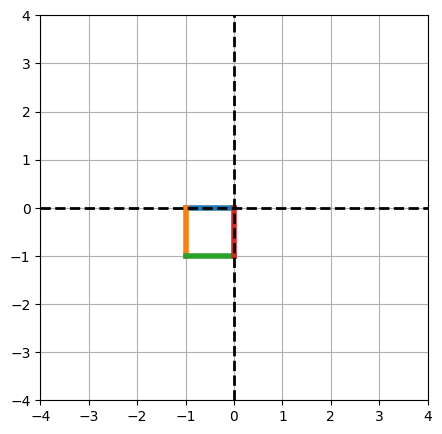

In [24]:
# Reflect about the y-axis first and then the x-axis.
reflected_square_y = transform_the_polygon(unit_square, Re_y)
reflected_square_x_y = transform_the_polygon(reflected_square_y, Re_x)
plot_the_polygon(reflected_square_x_y)

In [25]:
print("Reflect about the x-axis first and then the y-axis:")
print(np.matmul(Re_y, Re_x))

print("Reflect about the y-axis first and then the x-axis:")
print(np.matmul(Re_x, Re_y))

Reflect about the x-axis first and then the y-axis:
[[-1  0]
 [ 0 -1]]
Reflect about the y-axis first and then the x-axis:
[[-1  0]
 [ 0 -1]]


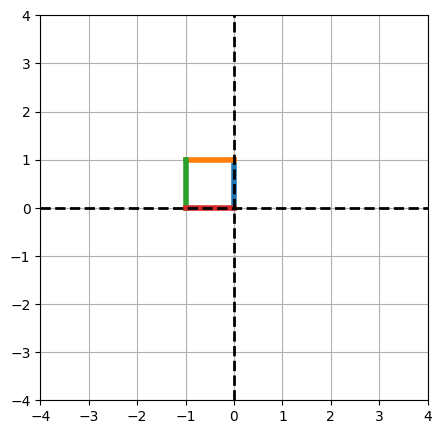

In [26]:
# Reflect about the x-axis first and then the line x=y.
reflected_square_x = transform_the_polygon(unit_square, Re_x)
reflected_square_xy_x = transform_the_polygon(reflected_square_x, Re_xy)
plot_the_polygon(reflected_square_xy_x)

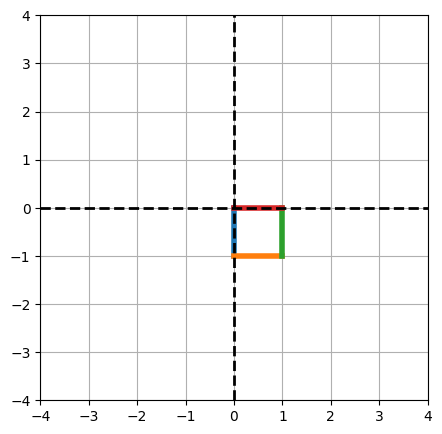

In [27]:
# Reflect about the line x=y first and then the x-axis.
reflected_square_xy = transform_the_polygon(unit_square, Re_xy)
reflected_square_x_xy = transform_the_polygon(reflected_square_xy, Re_x)
plot_the_polygon(reflected_square_x_xy)

In [28]:
print("Reflect about the x-axis first and then the line x=y:")
print(np.matmul(Re_xy, Re_x))

print("Reflect about the line x=y first and then the x-axis:")
print(np.matmul(Re_x, Re_xy))

Reflect about the x-axis first and then the line x=y:
[[ 0 -1]
 [ 1  0]]
Reflect about the line x=y first and then the x-axis:
[[ 0  1]
 [-1  0]]
